<a href="https://colab.research.google.com/github/avishek-astra/Deep_Learning_Experiments/blob/main/SeqvsClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
 #new
import torch.nn.functional as F

from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-1-926e83f342f0>:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


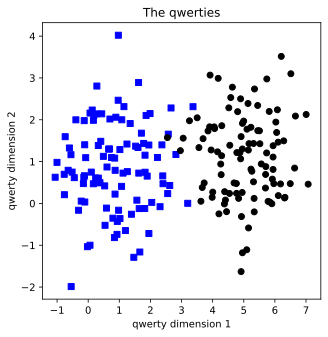

In [2]:
# data creation
nPerClust=100
blur=1

#data centre
A=[1,1]
B=[5,1]
#generate data
a=[A[0]+np.random.randn(nPerClust)*blur,A[1]+np.random.randn(nPerClust)*blur]
b=[B[0]+np.random.randn(nPerClust)*blur,B[1]+np.random.randn(nPerClust)*blur]
#true labels
labels_np=np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))
#concatanate
data_np=np.hstack((a,b)).T
#convert to a pytorch tensor
data=torch.tensor(data_np).float()
labels=torch.tensor(labels_np).float()
#show the data
fig=plt.figure(figsize=(5,5))
plt.plot(data[labels[:,0]==0,0],data[labels[:,0]==0,1],'bs')
plt.plot(data[labels[:,0]==1,0],data[labels[:,0]==1,1],'ko')
plt.title('The qwerties')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()




In [ ]:
#building a nn model
#ANNclassify=nn.Sequential(
    #nn.Linear(2,1), #input layer
    #nn.ReLU(), #activation function
    #nn.Linear(1,1),#output layer
    #nn.Sigmoid(),#final activation unit
#)
#ANNclassify


Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [3]:
#define the class
class theClass4ANN(nn.Module):
  def __init__(self):
    super().__init__()
    self.input=nn.Linear(2,1)
    self.output=nn.Linear(1,1)
  def forward(self,x):
    #pass through the input layer
    x=self.input(x)
    #apply relu
    x=F.relu(x)
    #output layer
    x=self.output(x)
    x=torch.sigmoid(x)
    return x
## create an instance of the class
ANNclassify=theClass4ANN()

In [4]:
#model parameters
#Learning rate
LearningRate=0.01
#loss function
lossfun=nn.BCELoss()
#optimizer (the flavour of gradient descent to implement)
optimizer=torch.optim.SGD(ANNclassify.parameters(),lr=LearningRate)


In [5]:
#train the model
numepochs=1000
losses=torch.zeros(numepochs)
#Train the model
for epochi in range(numepochs):
  #forward pass
  yHat=ANNclassify(data)
  #compute loss
  loss=lossfun(yHat,labels)
  losses[epochi]=loss.item()

  #backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


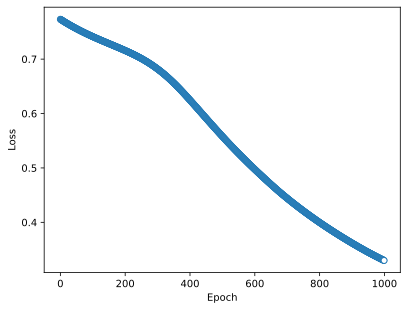

In [6]:
#manually compute losses
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [7]:
#compute the predictions
#manually compute losses
#final forwardpass
predictions=ANNclassify(data)
predlabels=predictions>.5
#finding errors
misclassified=np.where(predlabels!=labels)[0]
#total accuracy
totalacc=100-100*len(misclassified)/(2*nPerClust)
print('final accuracy :%g%%'%totalacc)

final accuracy :90%


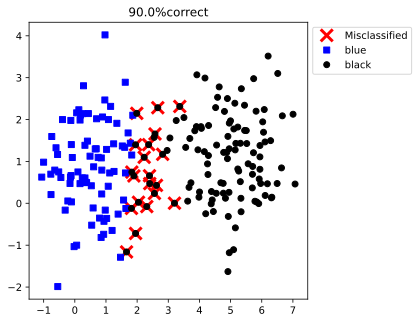

In [8]:
#plot the data
#plot the data
fig=plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0],data[misclassified,1],'rx',markersize=12,markeredgewidth=3) # Changed markerwidth to markeredgewidth
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0],data[np.where(predlabels)[0],1],'ko')
plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}%correct')
plt.show()
